#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

#### LOADING DATASETS

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")

#### COMBINING THE DATASETS


In [3]:
data = pd.concat([train,test],sort=False).reset_index(drop=True)

#### UNDERSTANDING THE DATASET (EDA)

In [4]:
data.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

In [6]:
data.shape

(28648, 19)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,28648.0,2010.271537,4.553145,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,28648.0,0.027018,0.095199,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,28648.0,0.041010,0.118721,0.000000,0.000000,0.000160,0.008011,0.894608
ghsl_built_1975_to_1990,28648.0,0.027820,0.072850,0.000000,0.000000,0.000602,0.010037,0.685010
ghsl_built_1990_to_2000,28648.0,0.013713,0.034208,0.000000,0.000037,0.000936,0.008823,0.515534
ghsl_built_2000_to_2014,28648.0,0.018369,0.040241,0.000000,0.000109,0.001727,0.015209,0.649159
ghsl_not_built_up,28648.0,0.872069,0.242707,0.000859,0.895615,0.992725,0.999592,1.000000
ghsl_pop_density,28648.0,95.101508,210.079701,0.000000,2.943082,16.424158,64.364772,1902.876955
landcover_crops_fraction,28648.0,21.097237,16.309999,0.000000,6.105505,19.297194,33.199903,80.064918
landcover_urban_fraction,28648.0,14.079153,23.917510,0.000000,0.705307,2.599028,13.063126,98.784092


In [8]:
data.isnull().any()


ID                                         False
country                                    False
year                                       False
urban_or_rural                             False
ghsl_water_surface                         False
ghsl_built_pre_1975                        False
ghsl_built_1975_to_1990                    False
ghsl_built_1990_to_2000                    False
ghsl_built_2000_to_2014                    False
ghsl_not_built_up                          False
ghsl_pop_density                           False
landcover_crops_fraction                   False
landcover_urban_fraction                   False
landcover_water_permanent_10km_fraction    False
landcover_water_seasonal_10km_fraction     False
nighttime_lights                           False
dist_to_capital                            False
dist_to_shoreline                          False
Target                                      True
dtype: bool

In [9]:
data.duplicated().any()

False

#### Encoding the categorical features


In [10]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['urban_or_rural'] = le.fit_transform(data['urban_or_rural'])
data['country'] = le.fit_transform(data['country'])

In [11]:
## convert INT dtypes to float
data["year"] = data['year'].astype('float')
data["urban_or_rural"] = data['urban_or_rural'].astype('float')
data["country"] = data['country'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  float64
 2   year                                     28648 non-null  float64
 3   urban_or_rural                           28648 non-null  float64
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

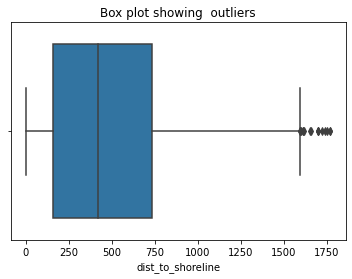

In [13]:
import scipy
plt.figure(figsize = (6,4))
sns.boxplot(data["dist_to_shoreline"])
plt.title("Box plot showing  outliers")
plt.show()

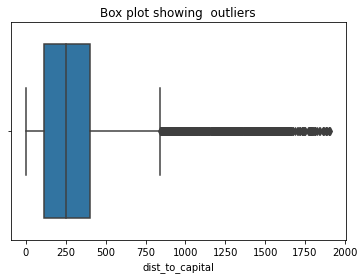

In [14]:
sns.boxplot(data["dist_to_capital"])
plt.title("Box plot showing  outliers")
plt.show()

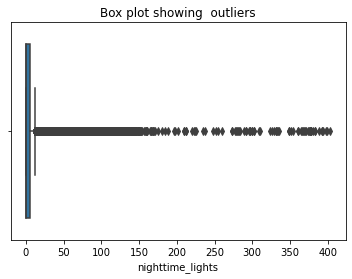

In [15]:
sns.boxplot(data["nighttime_lights"])
plt.title("Box plot showing  outliers")
plt.show()

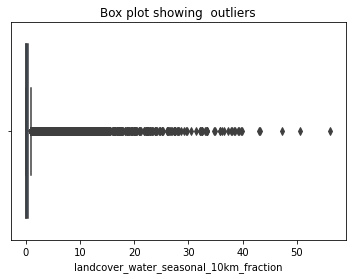

In [16]:
sns.boxplot(data["landcover_water_seasonal_10km_fraction"])
plt.title("Box plot showing  outliers")
plt.show()

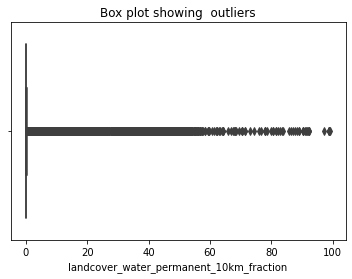

In [17]:
sns.boxplot(data["landcover_water_permanent_10km_fraction"])
plt.title("Box plot showing  outliers")
plt.show()

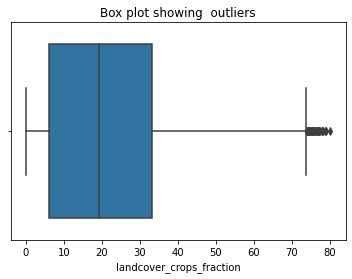

In [18]:
sns.boxplot(data["landcover_crops_fraction"])
plt.title("Box plot showing  outliers")
plt.show()

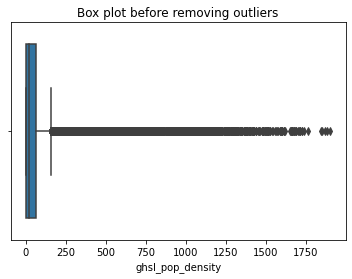

In [19]:
sns.boxplot(data["ghsl_pop_density"])
plt.title("Box plot before removing outliers")
plt.show()


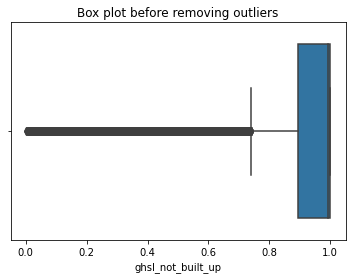

In [20]:
sns.boxplot(data["ghsl_not_built_up"])
plt.title("Box plot before removing outliers")
plt.show()


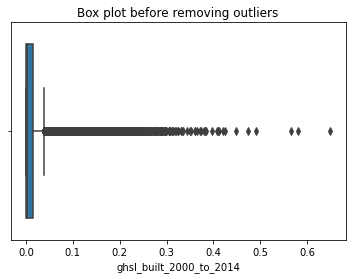

In [23]:
sns.boxplot(data["ghsl_built_2000_to_2014"])
plt.title("Box plot before removing outliers")
plt.show()

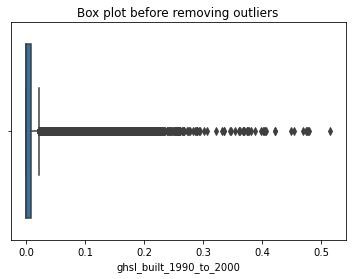

In [24]:
sns.boxplot(data["ghsl_built_1990_to_2000"])
plt.title("Box plot before removing outliers")
plt.show()

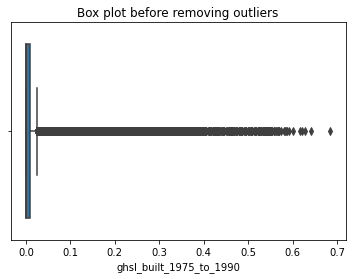

In [25]:
sns.boxplot(data["ghsl_built_1975_to_1990"])
plt.title("Box plot before removing outliers")
plt.show()

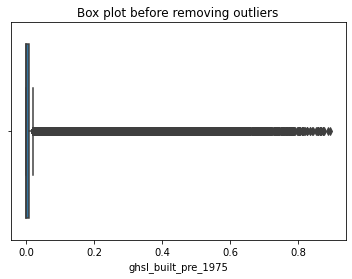

In [26]:
sns.boxplot(data["ghsl_built_pre_1975"])
plt.title("Box plot before removing outliers")
plt.show()

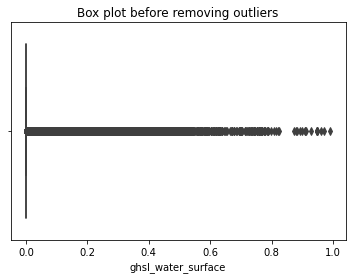

In [27]:
sns.boxplot(data["ghsl_water_surface"])
plt.title("Box plot before removing outliers")
plt.show()

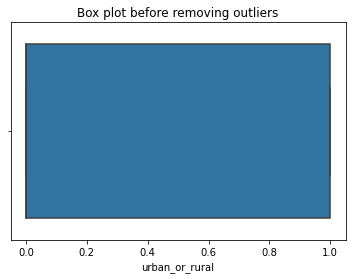

In [28]:
sns.boxplot(data["urban_or_rural"])
plt.title("Box plot before removing outliers")
plt.show()

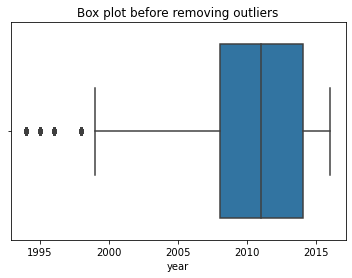

In [30]:
sns.boxplot(data["year"])
plt.title("Box plot before removing outliers")
plt.show()

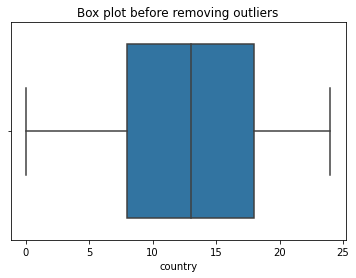

In [32]:
sns.boxplot(data["country"])
plt.title("Box plot before removing outliers")
plt.show()

### separating data into train and test

In [33]:
train=data[data.Target.notnull()].reset_index(drop=True)
test=data[data.Target.isna()].reset_index(drop=True)

In [34]:
train.shape , test.shape

((21454, 19), (7194, 19))

In [35]:
feat_cols = train.drop(["ID","Target"],1)
cols = feat_cols.columns
target=train["Target"]

In [36]:
train[cols].shape , target.shape

((21454, 17), (21454,))

In [37]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.20, random_state = 2021)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17163, 17) (17163,)
(4291, 17) (4291,)


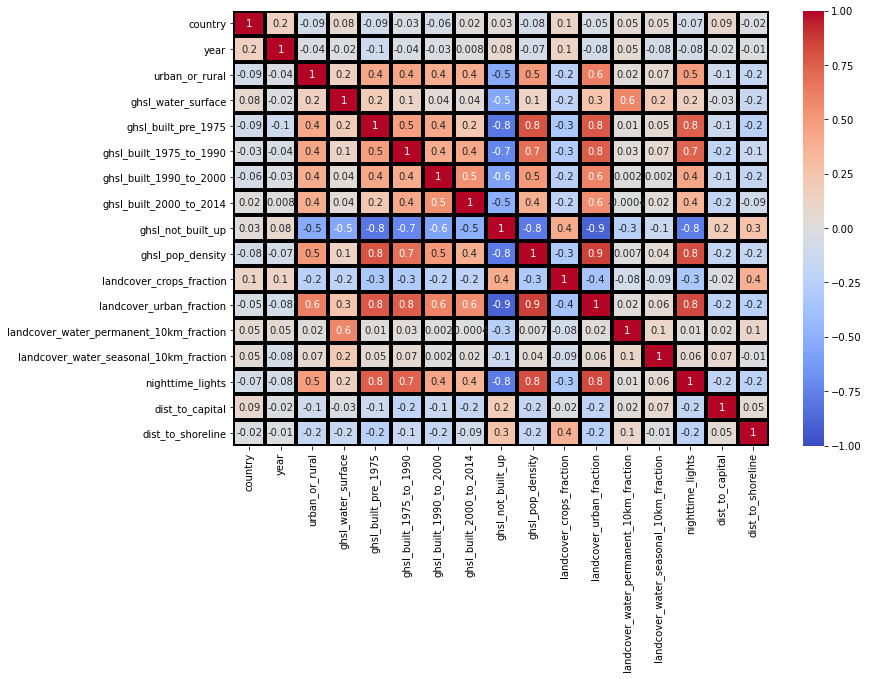

In [38]:
## using pearson correlation
plt.figure(figsize = (12,8))
ax=sns.heatmap(X_train.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')


In [39]:
## Selecting the high correlated feature using a function below
def correlation(dataset,threshold):
    col_corr = set() ## set of all correlated columns
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i] ##get name of correlated columns
                col_corr.add(colname)
                return col_corr

In [40]:
corr_features = correlation(X_train,0.8)
len(set(corr_features))

1

In [41]:
corr_features

{'landcover_urban_fraction'}

In [42]:
X_train.drop(corr_features,1)
X_test.drop(corr_features,1)

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
13337,15.0,2003.0,0.0,0.000000,0.005635,0.015668,0.013112,0.017091,0.948494,106.910874,40.829892,0.000000,0.126714,1.316003,436.006354,832.038396
21042,15.0,2015.0,1.0,0.091322,0.061362,0.119910,0.028835,0.203428,0.495143,221.123236,7.429848,2.343612,5.889725,21.192204,187.263262,311.010589
12597,10.0,2015.0,0.0,0.000000,0.000075,0.000113,0.000000,0.000207,0.999606,33.542194,41.109704,0.000000,0.002893,0.000000,351.214717,756.078408
6923,20.0,2016.0,0.0,0.000000,0.000055,0.000000,0.000055,0.000018,0.999871,18.137053,10.813144,0.000000,0.000000,0.000000,370.327482,45.608045
4940,8.0,2014.0,0.0,0.000000,0.000746,0.008500,0.013984,0.010863,0.965907,14.775095,1.460928,0.000000,0.023805,1.432443,251.932840,89.201182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17624,8.0,2008.0,1.0,0.002917,0.087829,0.127271,0.005624,0.043270,0.733089,40.399337,31.418471,7.403486,9.619806,4.664056,148.009755,25.274056
1580,15.0,2008.0,0.0,0.000000,0.000758,0.000240,0.000018,0.002495,0.996489,1.290460,11.283751,0.000000,0.000000,0.000000,471.342800,78.172041
3173,11.0,2014.0,1.0,0.000000,0.003127,0.119836,0.083657,0.060730,0.732650,78.000861,21.845634,0.253568,0.282033,20.245639,7.160180,322.969491
13296,10.0,2015.0,0.0,0.000262,0.000112,0.000412,0.000562,0.000019,0.998631,5.421893,12.651413,0.037267,2.155547,0.000000,392.410647,36.162909


### scaling and normalizing data.

In [48]:
# scaling training data & save lambda value
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_train
                              

array([[-0.31464986],
       [ 3.78322644],
       [-0.34549188],
       ...,
       [-0.33313793],
       [ 0.4118884 ],
       [-0.33994808]])

In [49]:
sns.boxplot(X_train["dist_to_shoreline"])
plt.title("Box plot showing  outliers")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices